# Mobile Phone Activity

### Data Description
Call Detail records dataset is a part of Telecom Italia Big Data Challenge 2014. Daily activity filed from Dandelion API are used as data sources, where the files contains CDR records generated by the Telecom Italia cellular network over the city of Milano. The daily CDR activity files contain information for 10,000 grids about SMS in and out, Call in and out, and Internet activity. CSV files contain five million records. 

### Data Prepration
Files are downloaded http://go.nature.com/2fz4AFr and aggregated by day, hour and cell Id. In this notebook we cluster the square IDs based on usage and create a heatmap on hours and clusters.

In [12]:
import os
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dir='...Files'
file_list=os.listdir(dir) #Creates a list with files in dir variable

In [2]:
df=[] #Create an empty dataframe
for idx,date in enumerate(file_list):   
    filename=os.path.join(dir,date)
    df.append(pd.read_csv(filename,header=None,sep='\t')) #Reads each csv file, loads into a dataframe

In [10]:
dframe = dframe111.drop('Unnamed: 0',axis=1)

In [3]:
dframe=pd.concat(df) #created a dataframe with all the records for Nov
len(dframe)

4630427

### Features in Data
The dataset contains eight numerical features about SMS in and out activity, call in and out activity, Internet traffic activity, square grid ID where the activity has happened, country code, and timestamp information about when the activity has been started.

In [4]:
dframe.head()
#Assign columns for dataframe
dframe.columns=['square_id','time_interval','country_code','sms_in_activity','sms_out_activity','call_in_activity','call_out_activity','internet_traffic_activity']

In [18]:
dframe['datetime']=pd.to_datetime(dframe.time_interval, unit='ms')


### Data Pre-processing
1. Derive new fields such as “activity start date” and “activity hour” from “time interval” field.
2. Find the total activity, which is the sum of SMS in and out activity, call in and out activity, and Internet traffic activity.


In [13]:
dframe=dframe.fillna(0)
#dframe['datetime'] = pd.to_datetime(dframe['datetime'])
dframe['date']=dframe['datetime'].dt.date
dframe['hour']=dframe['datetime'].dt.hour
dframe['Total_Activity']=dframe['sms_in_activity']+dframe['sms_out_activity']+dframe['call_in_activity']+dframe['call_out_activity']+dframe['internet_traffic_activity']


### CDR Exploratory Data Analysis 
1. Create Total Activity Plots by activity hours
2. Plot total activity for top 25 square_ids
3. Plot total activity for top 5 country codes

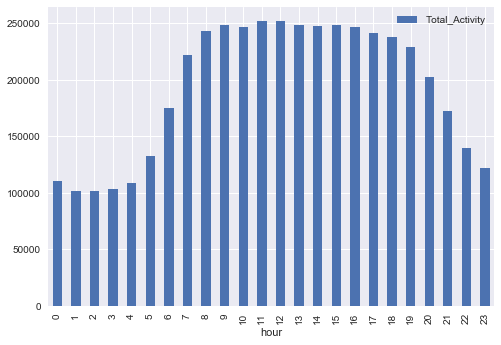

In [19]:
#Plotting activity for each hour
group1=dframe['Total_Activity'].groupby(dframe['hour'])
x=group1.count()
df1=pd.Series.to_frame(x)
df1['hour']=df1.index  #group1.sum() creates a series with hour as index. This step creates a column with index
#Bar plot for total activity by hour 
df1.plot(x='hour',y='Total_Activity',kind='bar')

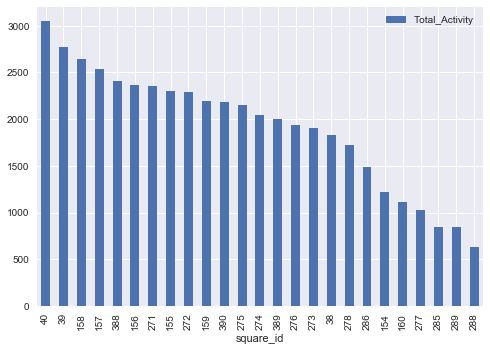

In [29]:
#Plotting total activity for top 25 square_ids
group1=dframe['Total_Activity'].groupby(dframe['square_id'])
y=group1.count()
df2=pd.Series.to_frame(y)
df2['square_id']=df2.index  #group1.sum() creates a series with square_id as index. This step creates a column with index
df3=df2.head(25)
df3=df3.sort_values('Total_Activity',ascending=False)
#Bar plot for top 25 square_ids 
df3.plot(x='square_id',y='Total_Activity',kind='bar')

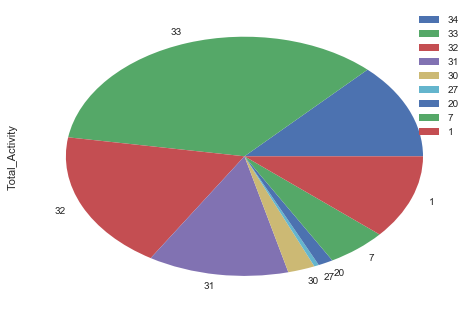

In [39]:
#Plotting top 5 country total acticity
group3=dframe['Total_Activity'].groupby(dframe['country_code'])
z=group3.count()
df4=pd.Series.to_frame(z)
df4['country_code']=df4.index  #group1.sum() creates a series with square_id as index. This step creates a column with index
df4=df4.head(10)
df4=df4[df4.country_code != 0]
df4=df4.sort_values('country_code',ascending=False)
#Bar plot for top 25 square_ids 
df4.plot(x='country_code',y='Total_Activity',kind='pie')

### Clustering based on Total Activity
Unsupervised clustering algorithm is used to find the pattern in the data. Number of clusters are determined by using Elbow method.


In [106]:
#Using K-means unsupervised algorithm to cluster activity by time
X=df1
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
verbose=0)
labels = kmeans.predict(X)
score=kmeans.score(X)
centroids = kmeans.cluster_centers_
df1['labels']=labels

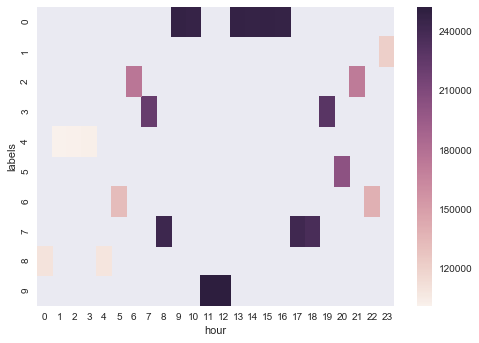

In [107]:
df5 = df1.iloc[:,2:4]  
pivot=df1.pivot('labels','hour','Total_Activity')
sns.heatmap(pivot)

### Insights from Analysis
1. Most of the activities happened in the square grid ID 147. 
2. Hours 11 and 12 have maximum activity while hours 1 and 2 have very low activity.
3. Country code 33 have higher activity followed by code 32
4. Heat Map indicates that clusters 0,7,9 have more activity and they are revenue generating clusters. Cluster 4 has lower activity.
